# Tutorial: Poisson equation

In this tutorial, we demonstrate the basic concepts
and workflow of scikit-fem. This is done by solving
the canonical model problem for second-order partial
differential equations: find $u : \Omega \rightarrow \mathbb{R}$
that satisfies

$$
    \begin{aligned}
        -\Delta u &= f, && \text{in $\Omega$},\\
        u &= 0, && \text{on $\partial \Omega$},
    \end{aligned}
$$

where $\Omega = (0,1)^2$ and $f$ is the loading.  This simple model
problem and its variants have applications, e.g., in [electrostatics](https://en.wikipedia.org/wiki/Laplace%27s_equation#Electrostatics_2>),
[acoustics](https://en.wikipedia.org/wiki/Helmholtz_equation) and [fluid flow](https://en.wikipedia.org/wiki/Potential_flow#Analysis_for_two-dimensional_flow>).
Finite element method can be used for solving the problem's weak formulation:
find $u \in H^1_0(\Omega)$ that satisfies

$$
    (\nabla u, \nabla v) = (f, v)  \quad \forall v \in H^1_0(\Omega).
$$

We discretise this problem using piecewise-linear triangular finite elements.  A
mesh for the unit square can be obtained using the default constructor of
`skfem.mesh.MeshTri`.  In the following, we further refine the default mesh four
times:

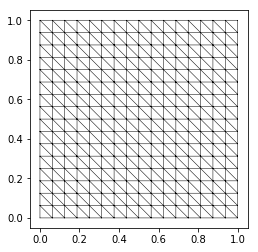

In [2]:
from skfem import *
%matplotlib inline

m = MeshTri()
m.refine(4)

m.draw()

After creating the mesh, we evaluate the finite element basis at the global
quadrature points. This is done within an object of the type
`skfem.assembly.InteriorBasis` whose constructor requires the mesh and an
`skfem.element.Element` object:

In [3]:
e = ElementTriP1()
basis = InteriorBasis(m, e)

The class `skfem.element.ElementTriP1` is a child of `skfem.element.Element` and it defines
the local basis functions and transformation rules.

The bilinear and linear forms can be defined using the decorators
`skfem.assembly.bilinear_form` and `skfem.assembly.linear_form`. It is important to have the order of the
form arguments correct.

In [4]:
@bilinear_form
def laplace(u, du, v, dv, w):
    return du[0]*dv[0] + du[1]*dv[1]

@linear_form
def load(v, dv, w):
    return 1.0*v

All assembly operations can now be performed with the function `skfem.assembly.asm`
which returns either SciPy sparse matrices or NumPy vectors depending on the
input.

In [5]:
A = asm(laplace, basis)
b = asm(load, basis)

We are left with solving the assembled linear system. Due to the zero boundary condition this is simple, and we do this only in the interior nodes of the mesh.

In [6]:
I = m.interior_nodes()

x = 0*b
x[I] = solve(*condense(A, b, I=I))

The solution can now be visualised using `skfem.mesh.MeshTri.plot3`. 

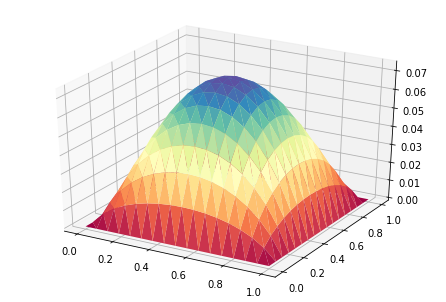

In [7]:
m.plot3(x)